# SAR Info Image Processor - Détection de contours avec  le filtre de Sobel et estimation des temps d'éxécution 

IMT Atlantique - 2021

Amer Baghdadi et Nicolas Farrugia 

L'opérateur de sobel effectue une mesure du **gradient** 2D spatial d'une image. 
Il est utlisé pour trouver une approximation du gradient en chaque point de l'image. 

Le détecteur de contours de Sobel utilise une paire de masques de convolution $3x3$, l'un estimant le gradient horizontal (colonnes) et l'autre estimant le gradient vertical (lignes). 
 
Un masque de convolution est typiquement beaucoup plus petit que l'image. L'application d'un filtre de convolution consiste à parcourir toute l'image en positionnant le filtre sur tous les pixels de l'image source, en manipulant un petit "patch" de pixels à la fois. 

Les masques des filtres de Sobel sont définis ici : 

   $$Sobel_x =\begin{pmatrix}-1 & 0 & 1\\\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{pmatrix}$$
   
   $$Sobel_y =\begin{pmatrix}-1 & -2 & -1\\\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{pmatrix}$$
 
           
Amplitude du gradient :  $|G| = \sqrt{Gx^2 + Gy^2}$

Approximation      :  $|G| = |Gx| + |Gy|$
 
 
# Application de l'opérateur de Sobel  

* Pour chaque direction, on effectue une multiplication terme à terme de la matrice des coefficients du masque, avec un patch d'image de même taille centré sur un pixel de l'image d'entrée. On effectue ensuite la somme de la matrice résultante, et on calcule la valeur absolue du résultat pour obtenir le gradient dans la direction traitée. 

* L'opération précédente est répétée pour l'autre direction.

* Les deux gradients calculés sont alors additionnés

* Le résultat obtenu correspond au pixel centré sur la position actuelle du masque de convolution (pixel en noir sur l'image ci-dessous)

* Ce résultat est ensuite comparé avec un seuil. On mets à 0 tous les pixels en dessous de ce seuil, et à 255 tous ceux au dessus. 

<img src="attachment:sobel.png" width="200"> 


## Vérification de l'effet des masques de Sobel

Pour cela nous allons définir les opérateurs de Sobel. Nous pouvons utiliser deux numpy array contenant trois lignes et trois colonnes.

Compléter la cellule ci-dessous pour définir les filtres horizontaux et verticaux de Sobel, sobel_x et sobel_y à l'aide de numpy arrays. 

In [4]:
import numpy as np 

### A compléter 
sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_y = np.transpose(sobel_x)

Calculez les gradients horizontaux et verticaux des pixels surlignés dans les 3 exemples suivants :

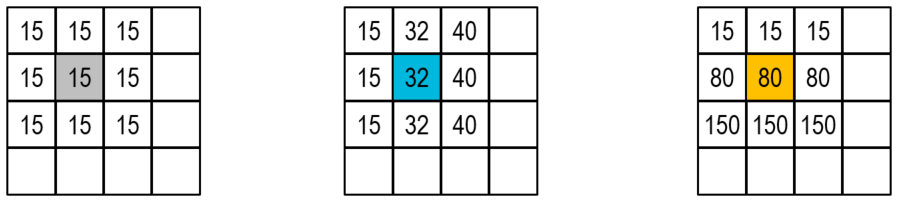

Note : les pixels sont codés en niveaux de gris sur 8 bits. 

Vous pouvez utiliser la fonction [multiply](https://docs.scipy.org/doc/numpy/reference/generated/numpy.multiply.html) de numpy pour directement effectuer le produit terme à terme, puis la fonction [sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html) pour effectuer la somme du résultat. 

In [119]:
### A compléter


### Définir les trois exemples comme des numpy array
### A compléter
ex_1 = np.full((3,3),15)
ex_2 = np.reshape(3 * [15,32,40],(3,3))
ex_3 = np.transpose(np.reshape(3 * [15,80,150],(3,3)))

### Coder une fonction apply_filter(mat_a,mat_b) 
### qui 
def apply_filter(mat_a ,mat_b) :
    '''effectue le produit terme a terme entre deux matrices mat_a et mat_b de même taille, 
    et retourne la somme de la matrice résultante
    '''
    return np.sum(np.multiply(mat_a, mat_b))


res_1_x = apply_filter(ex_1,sobel_x)
res_1_y = apply_filter(ex_1,sobel_y)

res_2_x = apply_filter(ex_2,sobel_x)
res_2_y = apply_filter(ex_2,sobel_y)

res_3_x = apply_filter(ex_3,sobel_x)
res_3_y = apply_filter(ex_3,sobel_y)

print(res_1_x,res_1_y)
print(res_2_x,res_2_y)
print(res_3_x,res_3_y)

0 0
100 0
0 540


## Développement d’un code logiciel pour implanter la détection de contours

Complétez le code suivant pour appliquer les masques de Sobel sur toute l'image et afficher le résultat de la détection de contours.



Tout d'abord, nous importons l'image.

In [120]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
img = np.array(Image.open('dancing-spider.jpeg')).astype(np.uint8)


L'image originale (img) et celle en niveau de gris (gray_img) sont des numpy array, examinons leurs "shapes"

In [121]:
print(img.shape)

(396, 396, 3)


Visualisons la

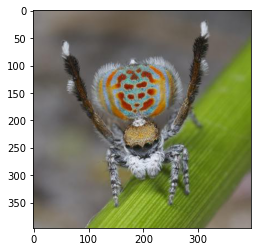

In [122]:
plt.imshow(img, cmap='gray')
plt.show()

Convertissons-la en niveau de luminance (voir [ici](https://en.wikipedia.org/wiki/Grayscale#Luma_coding_in_video_systems) pour une explication de ce calcul). 

In [137]:
# Apply gray scale
gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                    0.114 * img[:, :, 2]).astype(np.uint8)
print(gray_img.shape)

(396, 396)


Le résultat est bien un tableau en deux dimensions des niveaux de luminance. 
Affichez la 

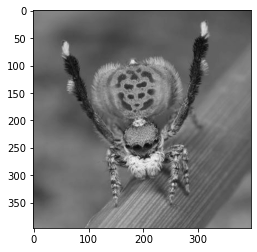

In [138]:
plt.imshow(gray_img, cmap='gray')
plt.show()

Nous pouvons maintenant effectuer le calcul proprement dit, en utilisant la fonction apply_filter codée plus haut

In [140]:
### Calcul du résultat de Sobel, non seuillé
### Fonction prenant en entrée une image étant un numpy array de taille (K,K), et les deux matrices de masques sobel
### Et retournant une image de taille (K,K) traitée par la méthode de Sobel 

def apply_sobel_image(img,sobel_x,sobel_y):
    
    ## Ceci permet d'extraire la taille de l'image d'entrée
    h, w = img.shape

    result = np.zeros((h, w))

    ### Boucle sur les lignes 
    for i in range(1, h - 1):

        ### Boucle sur les colonnes 
        for j in range(1, w - 1):
            
            
            ### Extraire le patch d'image sur lequel on calcule le résultat
            ### Rappel : pour une numpy array, pour chaque dimension, on peut indexer une array de la manière suivante : 
            ### par exemple mat[a:b,c:d] retournera une array contenant les éléments a à b-1 pour la première dimension, 
            ### et c à d-1 pour la deuxième dimension
            
            patch = img[i-1:i+2,j-1:j+2]
            
            ### Calculer le gradient horizontal
            
            horizontalGrad = apply_filter(patch,sobel_x)

            ### Calculer le gradient vertical

            verticalGrad = apply_filter(patch,sobel_x)
            ### Additioner les valeurs absolues des deux gradients, et stocker le résultat dans le pixel correspondant de resultImage

            result[i, j] = abs(horizontalGrad) + abs(verticalGrad)
            
            
    return result

In [141]:
resultImage = apply_sobel_image(gray_img,sobel_x,sobel_y)

Nous pouvons finalement visualiser le résultat 

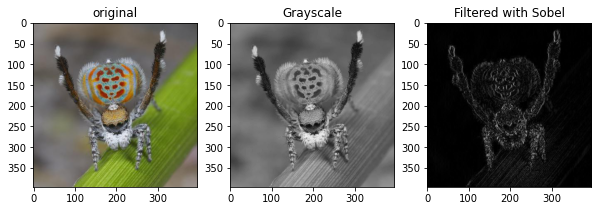

In [142]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('original')

plt.subplot(1,3,2)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale')

plt.subplot(1,3,3)
plt.imshow(resultImage, cmap='gray')
plt.title('Filtered with Sobel')

plt.show()

A noter qu'à ce stade, nous n'avons pas encore appliqué le seuil final. 

Dans la cellule suivante, définissez une fonction threshold_image(img,thr) qui prend une image grayscale img, et retourne une image binarisée contenant 255 pour les valeurs supérieures à thr. 

In [143]:

def threshold_imge(img,thr):
    return (img > thr) * np.full(img.shape,255)

Visualisez les résultats pour quelques valeurs de seuil 

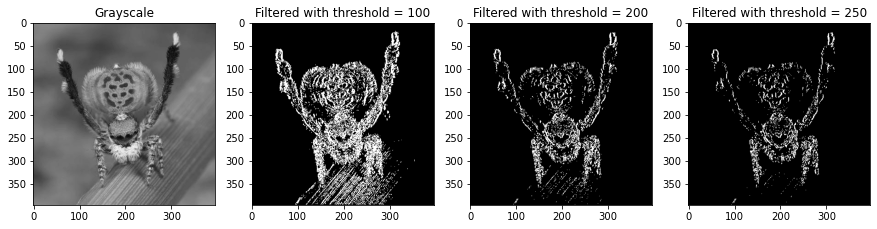

In [144]:
plt.figure(figsize=(15,5))

th1 = 100
th2 = 200
th3 = 250

plt.subplot(1,4,1)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale')

plt.subplot(1,4,2)
plt.imshow(threshold_imge(resultImage,th1), cmap='gray')
plt.title('Filtered with threshold = %d' % th1)

plt.subplot(1,4,3)
plt.imshow(threshold_imge(resultImage,th2), cmap='gray')
plt.title('Filtered with threshold = %d' % th2)

plt.subplot(1,4,4)
plt.imshow(threshold_imge(resultImage,th3), cmap='gray')
plt.title('Filtered with threshold = %d' % th3)

plt.show()

Vous pouvez sauvegarder le résultat sur disque

In [145]:
plt.imsave('dancing-spider-sobel.png', resultImage, cmap='gray', format='png')

# Evaluation (approximative) du temps d'exécution 
 
Nous allons maintenant évaluer la performance de cette solution logicielle.

Pour évaluer le temps d’exécution, nous allons utiliser l’instruction assembleur **rdtsc** (read time stamp counter) proposée dans les processeurs x86.

Cette instruction retourne le nombre de _cycles d'horloges_ écoulés depuis la dernière remise à zéro du processeur à travers la lecture d’un compteur spécial de 64 bits, nommé time stamp counter (compteur temporel).

Nous utilisons un wrapper python, qui implante une fonction get_cycles(), s'utilisant de la manière suivante : 



In [146]:
!pip3 install rdtsc

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.


In [147]:
import rdtsc

start = rdtsc.get_cycles()

c = 252 + 45 

end = rdtsc.get_cycles()

print("Nombre de cycles : %d" % (end - start ))

Nombre de cycles : 158250


Ecrire une nouvelle version de la fonction apply_sobel_image qui retourne également le nombre de cycles d'horloge pour effectuer le calcul d'une image entière. 

In [148]:
def apply_sobel_image_cycles(img,sobel_x,sobel_y):
    
    start = rdtsc.get_cycles()
    result = apply_sobel_image(img,sobel_x,sobel_y)
    n_cycles = rdtsc.get_cycles() - start
    
    return result,n_cycles

In [149]:
resultImage,n_cycles = apply_sobel_image_cycles(gray_img,sobel_x,sobel_y)
print(n_cycles)

1389317916


##### Proposer et effectuer de nouvelles actions pour vérifier la fiabilité de cette mesure du nombre de cycles d’horloge (e.g. répétition de la mesure plusieurs fois, histogramme, valeur moyenne, estimation des overheads, ...)

In [152]:
# réalisons 20 tests pour estimer la moyenne du temps d'exécution

n = 20
avg = sum([apply_sobel_image_cycles(gray_img,sobel_x,sobel_y)[1] for i in range(n)])/n
print(avg)

1419783718.7


# Estimation analytique de la complexité
 
Etudier analytiquement la complexité de la détection de contours avec le filtre de Sobel.


##### Réponse

Le détecteur de contours consiste à effectuer une double boucle for sur la largeur et la longueur de l'image. Les fonctions exécuté dans cette boucle ne dépendent pas de la taille de l'image est sont donc de complexité constante O(1).

On exécute la première boucle for h-2 fois et la seconde w-2 fois. On donc un complexité de O(1*(h-2)*(w-2)) = O(h*w). C'est-à-dire une complexité quadratique O(n^2) si l'image est carré.


## Comparaison entre l’estimation analytique et les mesures  

Comparer les résultats obtenus entre l’estimation analytique de la complexité et les mesures de temps d’exécution.

D'où peut venir une telle différence ? Qu'avons nous négligé dans notre calcul ? 


#### Cellule de texte à compléter pour réponse 


Notre estimation analytique nous donne un ordre de grandeur de 396*396 = 156 816 opérations élementaires à exécuter pour notre programme. Or ici, on mesure 1,4 milliards cycles d'horloge, c'est à dire 9000 fois plus. On néglige qu'une opération nécessite plusieurs cycle d'horloge. En effet, on a vu que l'addition faite en test du module chargé de compté le nombre de cycle d'horloge nécessite par un mais 158000 cycles d'horloges. Il existe donc un facteur k, tel que le nombre de cycle d'horloges est égale asymptotiquement à k * w * h. Ce terme semble expérientablement valoir 9000.

Il ne pas confondre la complexité avec le nombre de cycle d'horloge. Celle-ci doit servir uniquement à savoir comment le temps d'exécution / le nombre d'opérations élémentaire va varier en changeant la taille de l'entrée.